# <center> *Project - Car Evaluation Prediction Model*

## <span style='color:Purple'>Overall Approach

1. Import the data dataset.
2. Visualize the dataset.
3. Visualize the correlation between all the variables of the dataset.
4. Feature scaling.
5. Split the data into a training set and testing set.
6. Perform 5-fold cross-validation.
7. Train an SVM model for the dataset.
8. Get the classification report and confusion matrix.

#### Importing Libraries

In [1]:
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from matplotlib          import pyplot

# For max displays
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Encoding
from sklearn.preprocessing import LabelEncoder

# Model
from sklearn.svm             import SVC
from sklearn.metrics         import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import classification_report
from sklearn                 import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing   import StandardScaler

#### Read the data using pandas

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
headerList = ['Buying', 'Maint', 'Doors','Persons','Lug-boot','Safety','CAR Acceptability']
df = pd.read_csv(url, names = headerList)

#### Check the shape of the dataset

In [3]:
df.shape

(1728, 7)

### Attribute Information:

* Class Values (car acceptability): unacc, acc, good, vgood

* Attributes:<br>
buying (buying price): vhigh, high, med, low.<br>
maint (price of the maintenance): vhigh, high, med, low.<br>
doors (number of doors): 2, 3, 4, 5more.<br>
persons (capacity in terms of persons to carry): 2, 4, more.<br>
lug_boot (the size of luggage boot): small, med, big.<br>
safety (estimated safety of the car): low, med, high.

#### Check first few rows

In [4]:
df.head()

,Buying,Maint,Doors,Persons,Lug-boot,Safety,CAR Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


#### Check dtypes, null values of the dataset
<span style='background : yellow' > **Observation:**   </span> 
* All features and Target are catregorical
* There is no null value in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Buying             1728 non-null   object
 1   Maint              1728 non-null   object
 2   Doors              1728 non-null   object
 3   Persons            1728 non-null   object
 4   Lug-boot           1728 non-null   object
 5   Safety             1728 non-null   object
 6   CAR Acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#### Checking for duplicate record
<span style='background : yellow' > **Observation:**   </span> No duplicate rows for the given dataset

In [6]:
df.duplicated().sum()

0

### Spliiting data - Feature & Label

In [7]:
# X would contain all the features and y contains the Label of the dataset.
X = df.drop('CAR Acceptability', axis=1)
y = df[['CAR Acceptability']]

### <span style='color:Purple'>Visualize the dataset

#### Univariate - Histogram

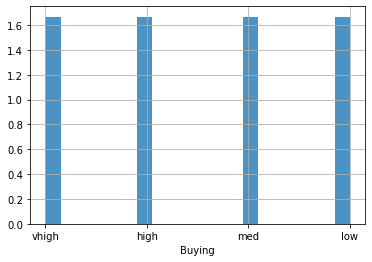

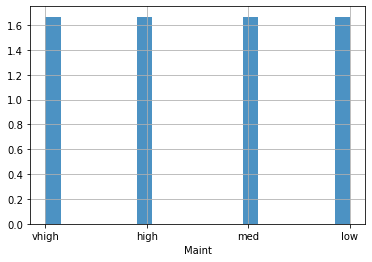

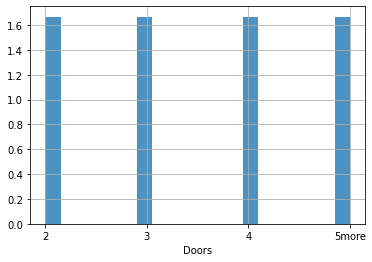

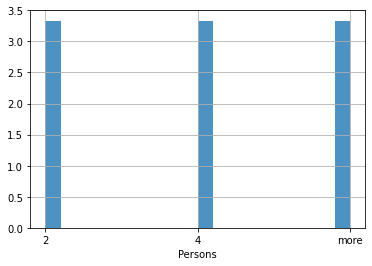

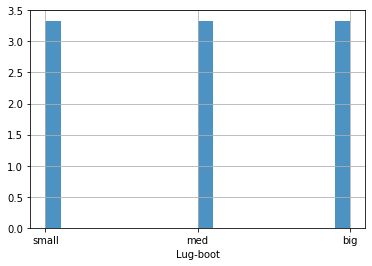

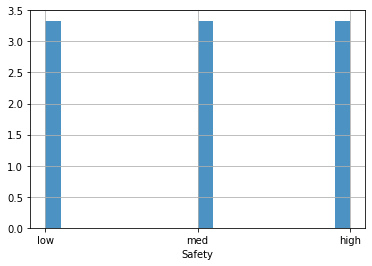

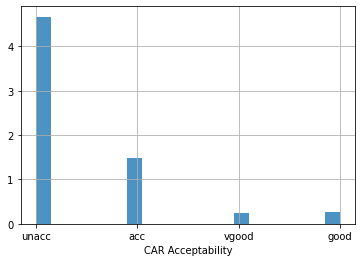

In [8]:
# Histogram
for (columnName, columnData) in df.iteritems():
    plt.xlabel(columnName)
    df[columnName].hist(bins = 20, density = 1, alpha = 0.8)
    plt.show()

#### Bivariate
<span style='background : yellow' > **Observation:**   </span>
* Car having high mantainence are least accepted.
* Person capacity requirement minimum is 4.
* Medium to high level safety is acceptable.

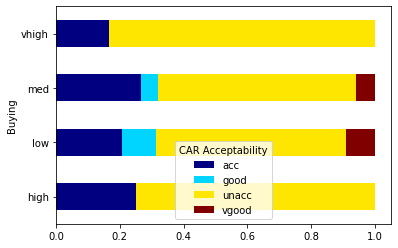

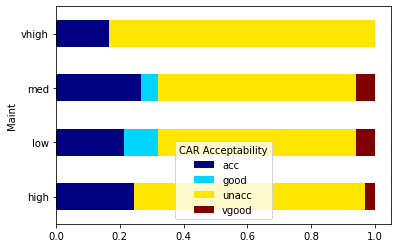

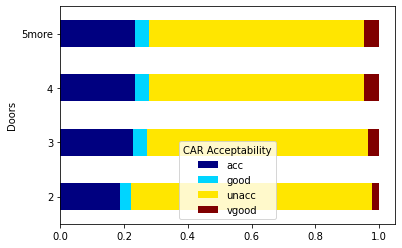

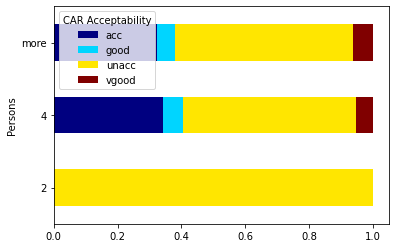

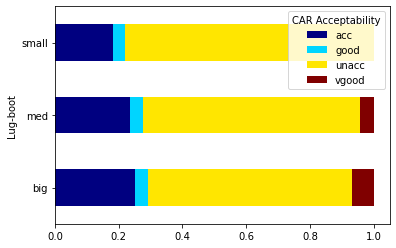

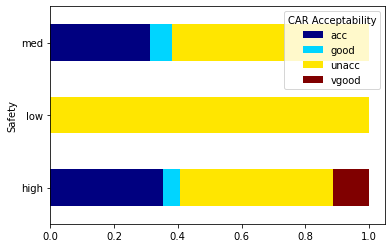

In [9]:
from matplotlib import cm
cmap = cm.get_cmap('jet')
for (columnName, columnData) in df.iteritems():
    if columnName != 'CAR Acceptability':
        Bivariate_Plot = pd.crosstab(df[columnName],df['CAR Acceptability'])
        Bivariate_Plot.div(Bivariate_Plot.sum(1).astype(float), axis=0).plot(kind="barh", cmap=cmap, stacked=True)
        plt.show()

### Converting Categorical feature to numerical

In [10]:
# Label Encoding
le = LabelEncoder()

df.Buying = le.fit_transform(df.Buying)
df.Maint = le.fit_transform(df.Maint)
df['Lug-boot'] = le.fit_transform(df['Lug-boot'])
df.Safety = le.fit_transform(df.Safety)
df.Persons = le.fit_transform(df.Persons)
df.Doors = le.fit_transform(df.Doors)
df['CAR Acceptability'] = le.fit_transform(df['CAR Acceptability'])

In [11]:
df.dtypes

Buying               int64
Maint                int64
Doors                int64
Persons              int64
Lug-boot             int64
Safety               int64
CAR Acceptability    int64
dtype: object

### HeatMap

<AxesSubplot:>

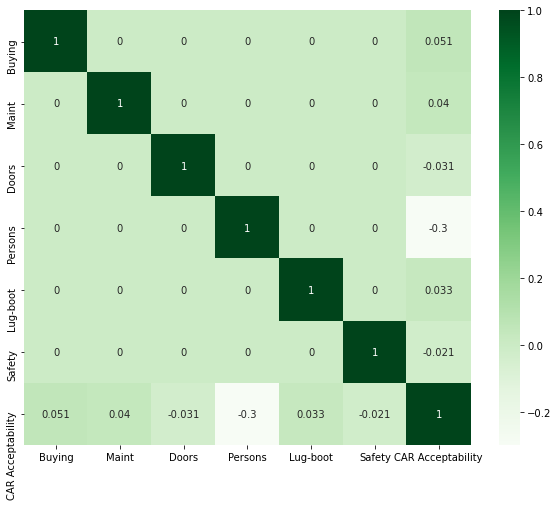

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='Greens', annot=True)

### PairPlot

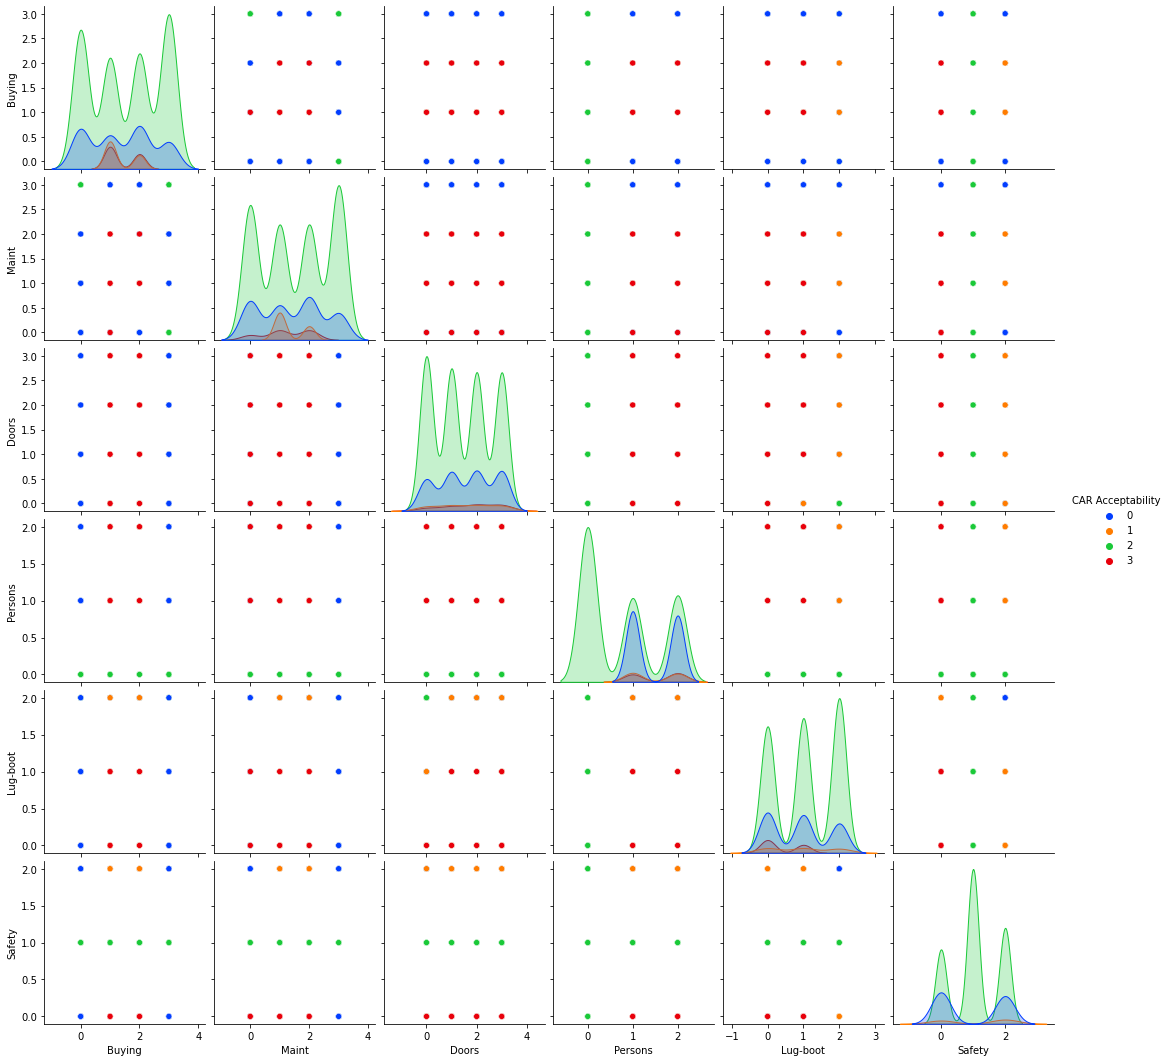

In [13]:
sns.pairplot(df, hue = "CAR Acceptability", palette = "bright")

### Scaling

In [14]:
scaler = StandardScaler()
df_Scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

### Test Train split

In [15]:
# Test Train split
X = df.drop('CAR Acceptability', axis = 1)
y = df[['CAR Acceptability']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42,
                                                    stratify = y)

print("Shape of Training set {0}".format(X_train.shape))
print("Shape of Test set {0}".format(X_test.shape))

Shape of Training set (1382, 6)
Shape of Test set (346, 6)


### 5-Fold Cross Validation

In [16]:
# scikit-learn k-fold cross-validation
from sklearn.model_selection import KFold

#Implementing cross validation 
k = 5
kf = KFold(n_splits=k, random_state=42)

### Train SVM Model

#### Linear Kernel

In [17]:
# Initializing Support Vector Machine and fitting the training data
classifier_linear = SVC(kernel='linear', random_state=42, decision_function_shape='ovo')
classifier_linear.fit(X_train, y_train)

SVC(decision_function_shape='ovo', kernel='linear', random_state=42)

In [18]:
classifier_linear.support_vectors_

array([[2., 2., 1., 1., 1., 2.],
       [1., 0., 3., 2., 2., 2.],
       [3., 1., 0., 1., 0., 2.],
       ...,
       [2., 2., 3., 2., 1., 0.],
       [1., 1., 1., 1., 0., 0.],
       [2., 2., 2., 2., 1., 0.]])

In [19]:
# Predicting the classes for test set
y_pred = classifier_linear.predict(X_test)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

result = cross_val_score(classifier_linear, X, y, cv = kf)
print("Cross validation Avg accuracy: {}".format(result.mean()))

Decision Tree model accuracy(in %): 72.83236994219652
Cross validation Avg accuracy: 0.6914367093909692


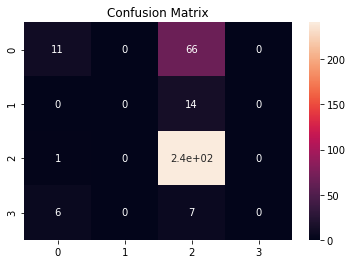

True Positives: 11
False Negatives: 66
False Positives: 7
True Negatives: 262


In [20]:
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()


print('True Positives:', cnf_matrix[0,0])

a = cnf_matrix[0,1] + cnf_matrix[0,2] + cnf_matrix[0,3]
print('False Negatives:', a)

b = cnf_matrix[1,0] + cnf_matrix[2,0] + cnf_matrix[3,0] 
print('False Positives:', b)

c = (cnf_matrix[1,1] + cnf_matrix[1,2] + cnf_matrix[1,3] +
     cnf_matrix[2,1] + cnf_matrix[2,2] + cnf_matrix[2,3] +
     cnf_matrix[3,1] + cnf_matrix[3,2] + cnf_matrix[3,3])
print('True Negatives:', c)

In [21]:
print('\nClassification Report\n')
print(classification_report(y_test,y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.61      0.14      0.23        77
           1       0.00      0.00      0.00        14
           2       0.73      1.00      0.85       242
           3       0.00      0.00      0.00        13

    accuracy                           0.73       346
   macro avg       0.34      0.28      0.27       346
weighted avg       0.65      0.73      0.64       346



#### Polynomial kernel

In [22]:
# Initializing Support Vector Machine and fitting the training data
classifier_poly = SVC(kernel='poly', random_state=42, decision_function_shape='ovo')
classifier_poly.fit(X_train, y_train)

y_pred_poly = classifier_poly.predict(X_test)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_poly)*100)

result = cross_val_score(classifier_poly, X, y, cv = kf)
print("Cross validation Avg accuracy: {}".format(result.mean()))

Decision Tree model accuracy(in %): 85.83815028901735
Cross validation Avg accuracy: 0.7436106224344475


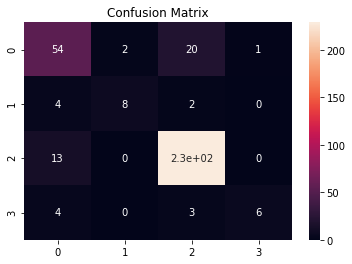

True Positives: 54
False Negatives: 23
False Positives: 21
True Negatives: 248


In [23]:
cnf_matrix = confusion_matrix(y_test, y_pred_poly)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])

a = cnf_matrix[0,1] + cnf_matrix[0,2] + cnf_matrix[0,3]
print('False Negatives:', a)

b = cnf_matrix[1,0] + cnf_matrix[2,0] + cnf_matrix[3,0] 
print('False Positives:', b)

c = (cnf_matrix[1,1] + cnf_matrix[1,2] + cnf_matrix[1,3] +
     cnf_matrix[2,1] + cnf_matrix[2,2] + cnf_matrix[2,3] +
     cnf_matrix[3,1] + cnf_matrix[3,2] + cnf_matrix[3,3])
print('True Negatives:', c)

In [24]:
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        77
           1       0.80      0.57      0.67        14
           2       0.90      0.95      0.92       242
           3       0.86      0.46      0.60        13

    accuracy                           0.86       346
   macro avg       0.82      0.67      0.73       346
weighted avg       0.86      0.86      0.85       346



#### Gaussian RBF kernel

In [25]:
# Initializing Support Vector Machine and fitting the training data
classifier_rbf = SVC(kernel='rbf', random_state=42, decision_function_shape='ovo')
classifier_rbf.fit(X_train, y_train)

y_pred_rbf = classifier_rbf.predict(X_test)
print("Decision Tree model accuracy(in %):", metrics.accuracy_score(y_test, y_pred_rbf)*100)

result = cross_val_score(classifier_rbf, X, y, cv = kf)
print("Cross validation Avg accuracy: {}".format(result.mean()))

Decision Tree model accuracy(in %): 92.77456647398844
Cross validation Avg accuracy: 0.79626204238921


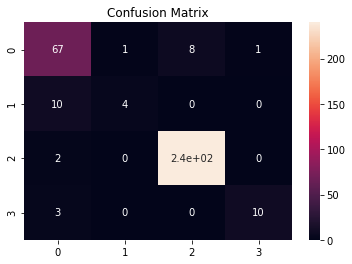

True Positives: 67
False Negatives: 10
False Positives: 15
True Negatives: 254


In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred_rbf)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])

a = cnf_matrix[0,1] + cnf_matrix[0,2] + cnf_matrix[0,3]
print('False Negatives:', a)

b = cnf_matrix[1,0] + cnf_matrix[2,0] + cnf_matrix[3,0] 
print('False Positives:', b)

c = (cnf_matrix[1,1] + cnf_matrix[1,2] + cnf_matrix[1,3] +
     cnf_matrix[2,1] + cnf_matrix[2,2] + cnf_matrix[2,3] +
     cnf_matrix[3,1] + cnf_matrix[3,2] + cnf_matrix[3,3])
print('True Negatives:', c)

In [27]:
print(classification_report(y_test,y_pred_rbf))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.80      0.29      0.42        14
           2       0.97      0.99      0.98       242
           3       0.91      0.77      0.83        13

    accuracy                           0.93       346
   macro avg       0.87      0.73      0.77       346
weighted avg       0.93      0.93      0.92       346



## <span style='color:Purple'> Conclusion </span>

* SVM (Gaussian RBF kernal) gives the best result for Car evaluation compared to others.<br>
Accuracy - 93% <br>
Classification Report

              precision    recall  f1-score   support

           0       0.61      0.14      0.23        77
           1       0.00      0.00      0.00        14
           2       0.73      1.00      0.85       242
           3       0.00      0.00      0.00        13
 
* SVM (Linear Kernal) Accuracy - 73%
* SVM (Polynomial Kernal) Accuracy - 86%
* 5 fold cross validation reduces the accuaracy score in the given dataset.<br>
Cross validation Avg accuracy (Linear Kernal): 0.69<br>
Cross validation Avg accuracy(Polynomial Kernal): 0.74<br>
Cross validation Avg accuracy (Gaussian RBF kernal): 0.79
